# Predicting if Fruit is Orange or Grapefruit

## Importing libraeries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import raza_stats as rs

## Reading citris.csv data

In [2]:
df = pd.read_csv('citrus.csv')

In [3]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [4]:
df.tail()

,name,diameter,weight,red,green,blue
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11
9999,grapefruit,16.45,261.51,152,74,2


## Performing statistics and some EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [6]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [7]:
for col_name in df.columns.drop('name'):
    rs.cal_stats(col_name,df[col_name])
    print('-'*60)

diameter
Total Sum 99756.85
Total Count 10000
Minimum 2.96
Maximum 16.45
Range 13.49
Average 9.98
Median 9.98
Mode ModeResult(mode=np.float64(8.42), count=np.int64(29))
Q1 8.46
Q3 11.48
IQR 3.0199999999999996
Lower Whisker 3.9300000000000015
Upper Whisker 16.009999999999998
Variance 3.7937155107750002
Standard Deviation 1.9477462644746621
Skewness -0.028313016667624907
Kurtosis -0.6681866401135328
------------------------------------------------------------
weight
Total Sum 1750507.92
Total Count 10000
Minimum 86.76
Maximum 261.51
Range 174.75
Average 175.05
Median 174.98
Mode ModeResult(mode=np.float64(138.09), count=np.int64(7))
Q1 152.22
Q3 197.7225
IQR 45.5025
Lower Whisker 83.96625
Upper Whisker 265.97625
Variance 853.262576972736
Standard Deviation 29.210658619290598
Skewness 0.022837268468197128
Kurtosis -0.6978991500614264
------------------------------------------------------------
red
Total Sum 1538478
Total Count 10000
Minimum 115
Maximum 192
Range 77
Average 153.85
Median 1

In [8]:
df.isnull().sum()/len(df)*100

name        0.0
diameter    0.0
weight      0.0
red         0.0
green       0.0
blue        0.0
dtype: float64

In [9]:
df.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [10]:
df.duplicated().sum()

np.int64(0)

#### Making BoxPlot

name


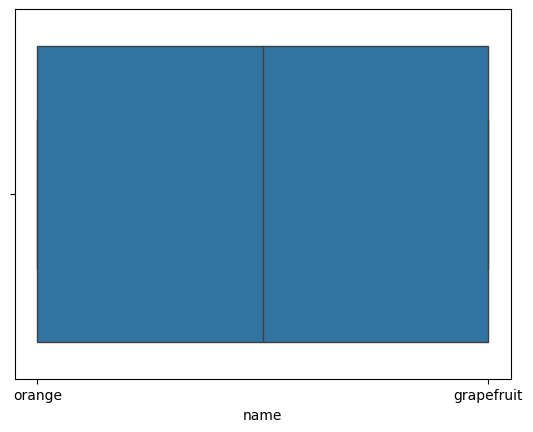

diameter


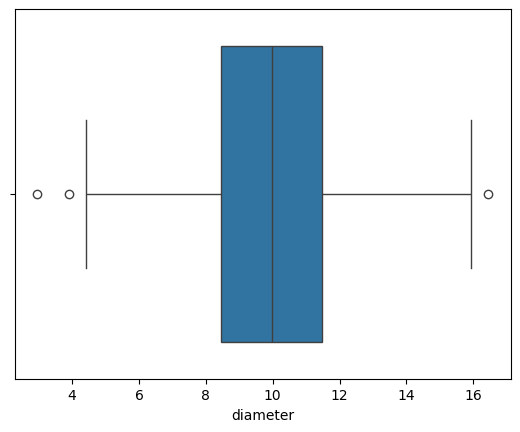

weight


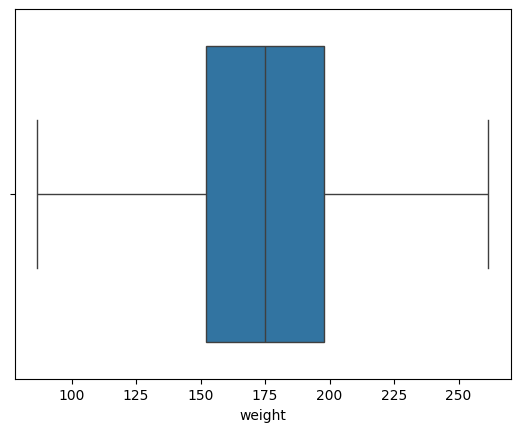

red


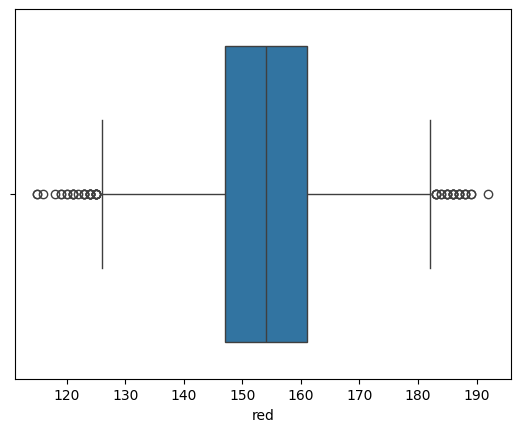

green


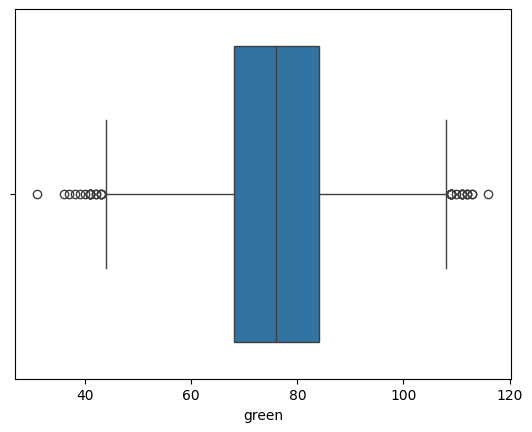

blue


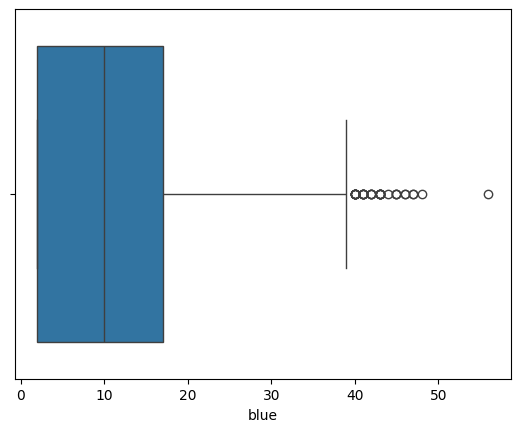

In [11]:
for col_name in df.columns:
    print(col_name)
    sns.boxplot(df , x = col_name)
    plt.show()
    

#### Creating a function for finding Upper Whisker and Lower Whisker

In [12]:
def stats (col_name , data):
    import numpy as np 
    import pandas as pd
    
    q1=np.percentile(data,25)
    print('Q1',q1)
    
    q3=np.percentile(data,75)
    print('Q3',q3)
    
    iqr=q3-q1
    print('IQR',iqr)
    
    lw= q1-iqr*1.5
    print('Lower Whisker', lw)
    
    uw= q3+iqr*1.5
    print('Upper Whisker', uw)

In [13]:
for col_name in df.columns.drop('name'):
    print(col_name)
    stats(col_name , df[col_name])
    print('-'*60)

diameter
Q1 8.46
Q3 11.48
IQR 3.0199999999999996
Lower Whisker 3.9300000000000015
Upper Whisker 16.009999999999998
------------------------------------------------------------
weight
Q1 152.22
Q3 197.7225
IQR 45.5025
Lower Whisker 83.96625
Upper Whisker 265.97625
------------------------------------------------------------
red
Q1 147.0
Q3 161.0
IQR 14.0
Lower Whisker 126.0
Upper Whisker 182.0
------------------------------------------------------------
green
Q1 68.0
Q3 84.0
IQR 16.0
Lower Whisker 44.0
Upper Whisker 108.0
------------------------------------------------------------
blue
Q1 2.0
Q3 17.0
IQR 15.0
Lower Whisker -20.5
Upper Whisker 39.5
------------------------------------------------------------


#### Handling Outliers

In [14]:
df['diameter'][df['diameter']<3.9300000000000015] = 3.9300000000000015
df['diameter'][df['diameter']>16.009999999999998] = 16.009999999999998

In [15]:
df['red'][df['red']<126.0] = 126.0
df['red'][df['red']>182.0] = 182.0

In [16]:
df['green'][df['green']<44.0] = 44.0
df['green'][df['green']>108.0] = 108.0

In [17]:
df['blue'][df['blue']>39.5] = 39.5

#### Making Distribution Plot

diameter


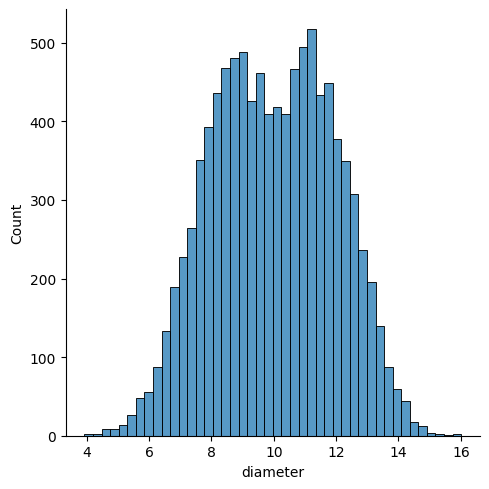

weight


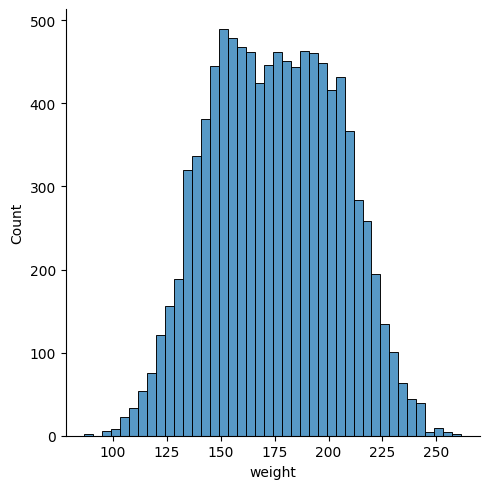

red


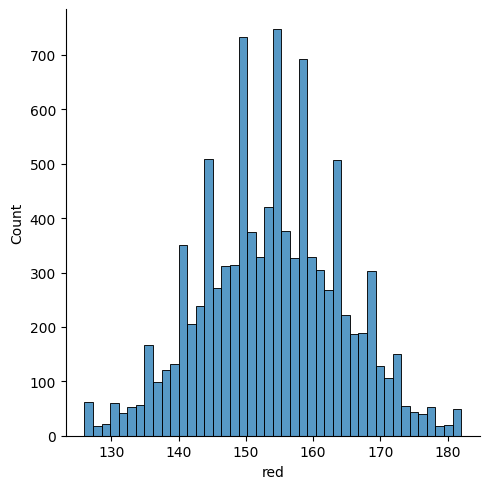

green


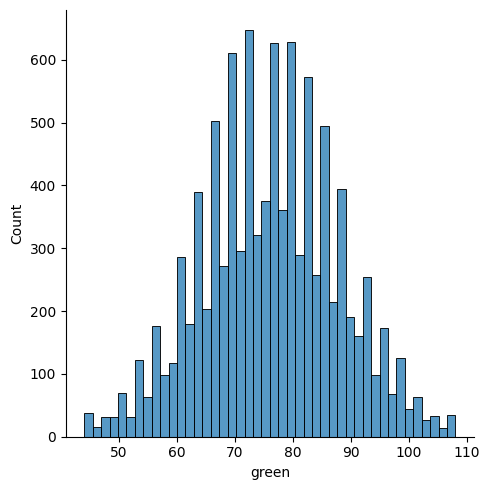

blue


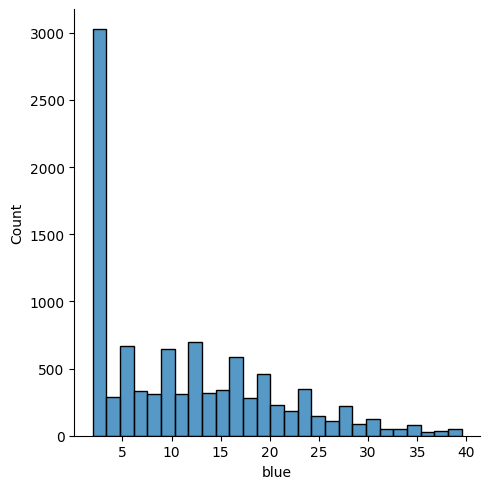

In [18]:
for col_name in df.columns.drop('name'):
    sns.displot(df , x = col_name)
    print(col_name)
    
    plt.show()

In [19]:
df

,name,diameter,weight,red,green,blue
0,orange,3.93,86.76,172,85,2.0
1,orange,3.93,88.05,166,78,3.0
2,orange,4.42,95.17,156,81,2.0
3,orange,4.47,95.60,163,81,4.0
4,orange,4.48,95.76,161,72,9.0
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20.0
9996,grapefruit,15.41,254.67,148,68,7.0
9997,grapefruit,15.59,256.50,168,82,20.0
9998,grapefruit,15.92,260.14,142,72,11.0


### Creating dummies of numeric values

In [20]:
df = pd.get_dummies(df , dtype = int , drop_first=True )

In [21]:
df

,diameter,weight,red,green,blue,name_orange
0,3.93,86.76,172,85,2.0,1
1,3.93,88.05,166,78,3.0,1
2,4.42,95.17,156,81,2.0,1
3,4.47,95.60,163,81,4.0,1
4,4.48,95.76,161,72,9.0,1
...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20.0,0
9996,15.41,254.67,148,68,7.0,0
9997,15.59,256.50,168,82,20.0,0
9998,15.92,260.14,142,72,11.0,0


### Creating a Heatmap

<Axes: >

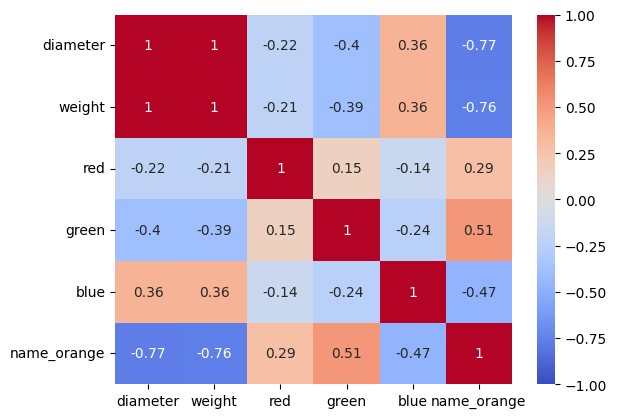

In [22]:
sns.heatmap(df.corr(numeric_only=True) , annot = True , vmin=-1 , vmax=1 , cmap='coolwarm')

### As Diameter and Weight are Highly and Positively Co-Related dropping the Diameter column

In [23]:
df.drop('diameter' , axis=1 , inplace = True)

### Dividing the data into x and to Train the Model

In [24]:
x = df.drop('name_orange' , axis=1)
y = df['name_orange']

#### By using train_test_split dividing the data for traning and testig the Model

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [26]:
df

,weight,red,green,blue,name_orange
0,86.76,172,85,2.0,1
1,88.05,166,78,3.0,1
2,95.17,156,81,2.0,1
3,95.60,163,81,4.0,1
4,95.76,161,72,9.0,1
...,...,...,...,...,...
9995,253.89,149,77,20.0,0
9996,254.67,148,68,7.0,0
9997,256.50,168,82,20.0,0
9998,260.14,142,72,11.0,0


### Standard Scaling the Data

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

## Now using Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_pred = lr.predict(x_test)

### Making Classification Report 

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       988
           1       0.93      0.94      0.93      1012

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



### Now using the Elbow method for finding the best k value for KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

error_li = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k , metric='euclidean')
    knn.fit(x_train , y_train)
    y_pred = knn.predict(x_test)
    error = 1-accuracy_score(y_test , y_pred)
    error_li.append(error)
    
    

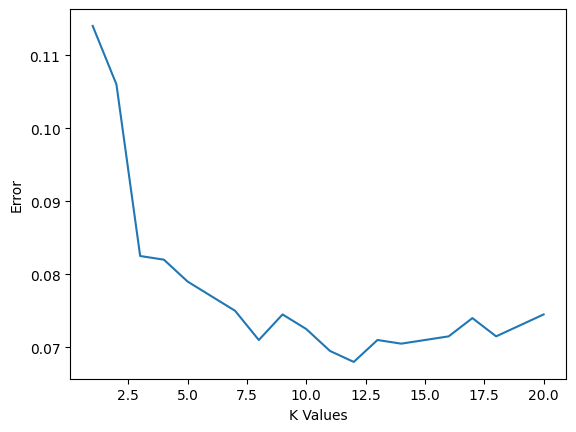

In [32]:
plt.plot(range(1,21) , error_li)
plt.xlabel('K Values')
plt.ylabel('Error')
plt.show()

### Performing KNN with best k value on trainig data and making a Classification Report

In [35]:
knn = KNeighborsClassifier(n_neighbors=20 , metric='euclidean')
knn.fit(x_train , y_train)
y_pred = knn.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.93      0.92      0.92       988
           1       0.92      0.93      0.93      1012

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [36]:
weight = float(input('Enter the weight in grams:'))
red = float(input('Enter the red colour in range 1 o 255:'))
green = float(input('Enter the green colour in range 1 to 255:'))
blue = float(input('Enter the blue colour in range 1 to 255:'))
input_li = np.array([weight,red,green,blue]).reshape(1,-1)
if lr.predict(input_li) ==0:
    print('The fruit is Grapefruit')
else:
    print('The fruit is Orange')

Enter the weight in grams: 233
Enter the red colour in range 1 o 255: 233
Enter the green colour in range 1 to 255: 233
Enter the blue colour in range 1 to 255: 233


The fruit is Grapefruit


In [34]:
df.iloc[3334]

weight         160.84
red            181.00
green           88.00
blue            22.00
name_orange      1.00
Name: 3334, dtype: float64